## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import sys

sns.set()
sys.path.append('../trees/scripts/')

from k_d_tree import KDTree

In [2]:
data_path = os.path.join('../data/')
n_hospitals = 10
n_patients = 7

## Data

In [3]:
hospitals = []
for i in range(n_hospitals):
    patients = []
    for j in range(n_patients):
        info = np.random.rand(3)*np.array([90, 75, 20]) + np.array([40, 15, 80])
        patients.append({
            'peso': info[0],
            'idade': info[1],
            'saturação': info[2]
        })
    x, y = np.random.rand(2)
    hospitals.append({
        'localização': [x, y],
        'pacientes': patients
    })
    
data = {'hospitais': hospitals}
data

{'hospitais': [{'localização': [0.547187229829659, 0.3153550440922246],
   'pacientes': [{'peso': 114.0289391192463,
     'idade': 21.903467263308812,
     'saturação': 84.71020722329212},
    {'peso': 74.74284851442835,
     'idade': 78.6185232607273,
     'saturação': 95.20178303428013},
    {'peso': 118.93050343098751,
     'idade': 71.2451735840337,
     'saturação': 97.5435342278668},
    {'peso': 126.13105492480159,
     'idade': 89.00419924395442,
     'saturação': 93.73841979448915},
    {'peso': 108.82719672733639,
     'idade': 73.6755088281933,
     'saturação': 97.27425144249145},
    {'peso': 65.63869503112923,
     'idade': 31.52168119063212,
     'saturação': 92.64662744503768},
    {'peso': 107.95340093704678,
     'idade': 25.95014705341643,
     'saturação': 83.01694336388638}]},
  {'localização': [0.816951586875233, 0.9041523810563277],
   'pacientes': [{'peso': 115.07244585210702,
     'idade': 80.87410224240165,
     'saturação': 96.90779723074078},
    {'peso': 11

In [4]:
import json
with open(os.path.join(data_path, 'data.json'), 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

## Exercise

In [5]:
supervisor = [0.5, 0.5]

In [6]:
points = np.array([hospital['localização'] for hospital in data['hospitais']])
points

array([[0.54718723, 0.31535504],
       [0.81695159, 0.90415238],
       [0.82244906, 0.4260533 ],
       [0.8242367 , 0.48855501],
       [0.52763769, 0.68551659],
       [0.16873212, 0.00802106],
       [0.7665793 , 0.2419299 ],
       [0.76086202, 0.0412192 ],
       [0.65773658, 0.63040815],
       [0.49758481, 0.76242768]])

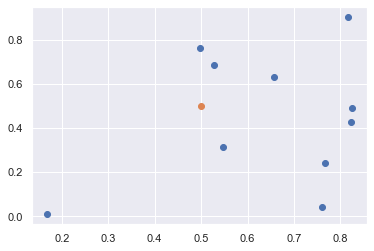

In [7]:
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(*supervisor)
plt.show()

In [8]:
hospitals_tree = KDTree(2)
for point in points.tolist():
    hospitals_tree.add(point)

In [9]:
hospitals_tree.knn(supervisor, 1)

[[0.5276376850474349, 0.6855165922699856]]